In [6]:
import pandas as pd
sales = pd.read_csv('2.home_data.csv')
sales

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


/Users/i066833/anaconda2/envs/dato-env/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


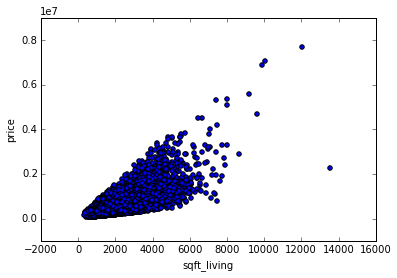

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
sales.plot(kind='scatter', x='sqft_living', y='price')

In [45]:
from sklearn.cross_validation import train_test_split
import numpy as np
train_data, test_data= train_test_split(sales, test_size=0.2, random_state=0)
X_train = pd.concat([pd.DataFrame(np.ones((train_data.shape[0],1)), index=train_data.index), train_data['sqft_living']], axis=1)
y_train = train_data['price']
X_test = pd.concat([pd.DataFrame(np.ones((test_data.shape[0],1)), index=test_data.index), test_data['sqft_living']], axis=1)
y_test = test_data['price']

In [47]:
#Linear Regression
from sklearn.linear_model import LinearRegression
sqft_model = LinearRegression()
sqft_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [50]:
print test_data['price'].mean()
print sqft_model.score(X_test, y_test)

538791.227388
0.504455419258


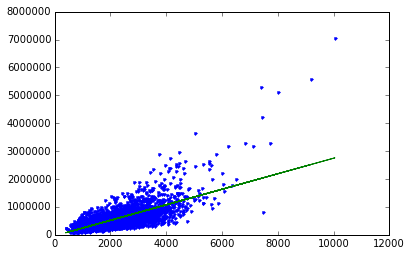

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],sqft_model.predict(X_test),'-')

In [53]:
print sqft_model.intercept_
print sqft_model.coef_

0.0
[-37117.37739868    278.28061812]


In [56]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
print sales[my_features]

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  zipcode
0             3       1.00         1180      5650     1.0    98178
1             3       2.25         2570      7242     2.0    98125
2             2       1.00          770     10000     1.0    98028
3             4       3.00         1960      5000     1.0    98136
4             3       2.00         1680      8080     1.0    98074
5             4       4.50         5420    101930     1.0    98053
6             3       2.25         1715      6819     2.0    98003
7             3       1.50         1060      9711     1.0    98198
8             3       1.00         1780      7470     1.0    98146
9             3       2.50         1890      6560     2.0    98038
10            3       2.50         3560      9796     1.0    98007
11            2       1.00         1160      6000     1.0    98115
12            3       1.00         1430     19901     1.5    98028
13            3       1.75         1370      9680     1.0    9

In [57]:
X_train = pd.concat([pd.DataFrame(np.ones((train_data.shape[0],1)), index=train_data.index), train_data[my_features]], axis=1)
y_train = train_data['price']
X_test = pd.concat([pd.DataFrame(np.ones((test_data.shape[0],1)), index=test_data.index), test_data[my_features]], axis=1)
y_test = test_data['price']

In [61]:
sqft_model = LinearRegression()
sqft_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [64]:
print sqft_model.score(X_test, y_test)
print sqft_model.coef_
print sqft_model.intercept_

0.529283821911
[  0.00000000e+00  -5.63582487e+04   1.92340942e+04   3.09098993e+02
  -2.98933561e-01  -6.89334575e+03   5.53153398e+02]
-54189422.7511


In [72]:
house1 = [sales['id'] == int("5309101200")]
print house1

In [73]:
print house1['price']
print sqft_model.predict(house1)
print my_features_model.predict(house1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1054,5309101200,20140605T000000,620000,4,2.25,2400,5350,1.5,0,0,...,7,1460,940,1929,0,98117,47.6763,-122.37,1250,4880


In [15]:
richzone = sales[sales['zipcode']==int('98039')]
answer1 = richzone['price'].mean()
print answer1

2160606.6


In [32]:
sales.shape

(21613, 21)

In [40]:
filter1 = sales[sales['sqft_living'] > int('2000')]
filter2 = filter1[filter1['sqft_living'] <= int('4000')]
answer2 = float(filter2.shape[0]) / float(sales.shape[0])
print answer2

0.421875722945


In [24]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']
advanced_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode','condition','grade','waterfront','view','sqft_above','sqft_basement','yr_built','yr_renovated','lat', 'long','sqft_living15','sqft_lot15']

In [25]:
from sklearn.cross_validation import train_test_split
import numpy as np
train_data, test_data= train_test_split(sales, test_size=0.2, random_state=0)
X1_train = pd.concat([pd.DataFrame(np.ones((train_data.shape[0],1)), index=train_data.index), train_data[my_features]], axis=1)
X1_test = pd.concat([pd.DataFrame(np.ones((test_data.shape[0],1)), index=test_data.index), test_data[my_features]], axis=1)
X2_train = pd.concat([pd.DataFrame(np.ones((train_data.shape[0],1)), index=train_data.index), train_data[advanced_features]], axis=1)
X2_test = pd.concat([pd.DataFrame(np.ones((test_data.shape[0],1)), index=test_data.index), test_data[advanced_features]], axis=1)
y_train = train_data['price']
y_test = test_data['price']

In [26]:
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()
my_model.fit(X1_train, y_train)
advanced_model = LinearRegression()
advanced_model.fit(X2_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
from sklearn.metrics import mean_squared_error
import numpy as np
my_rmse = np.sqrt(mean_squared_error(y_test, my_model.predict(X1_test)))
advanced_rmse = np.sqrt(mean_squared_error(y_test, advanced_model.predict(X2_test)))
answer3 = my_rmse - advanced_rmse
print answer3

53531.3987214
